In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import rectpack
from tqdm import tqdm_notebook
import copy

plt.rcParams['figure.figsize'] = 15, 6
plt.rcParams['figure.figsize'] = 15, 6

In [15]:
avia = pd.read_excel('Авиакомпании.xlsx')
avia

,Авиакомпания,Начало сезона технического обслуживания,Окончание сезона технического обслуживания,Штрафной коэффициент
0,Победа,2020-08-31,2020-10-31,0.1
1,Алроса,2020-09-10,2020-11-10,0.3
2,Уральские Авиалинии,2020-09-15,2020-11-15,0.3
3,Аэрофлот,2020-08-15,2020-11-30,0.4
4,C7,2020-09-01,2020-11-30,0.7
5,Белавия,2020-10-01,2020-11-30,0.1
6,Ютэир,2020-09-01,2020-12-15,0.2
7,Россия,2020-10-01,2020-12-15,0.2


In [6]:
angar = pd.read_excel('Ангары.xlsx')
angar.head()

,Ангар,"Ширина, м","Глубина, м"
0,DME (Домодедово-Москва),300,80
1,SVO (Шереметьево-Москва),200,90
2,VKO (Внуково-Москва),150,70


In [26]:
orders = pd.read_excel('Потребность Авиакомпаний.xlsx')
orders.head()

,Авиакомпания,Тип ВС,Формат ТО,"Потребность авиакомпании, штук","Длительность, \nдней","Минимальное количество форм ТО, \nкоторое необходимо выполнить по контракту, штук"
0,Ютэир,737-200,D-Check,1,42,NaN
1,Ютэир,737-200,C-Check,4,26,NaN
2,Ютэир,737-200,Painting,5,8,NaN
3,Победа,737-200,C-Check,2,28,NaN
4,Победа,737-200,Painting,3,8,NaN


In [9]:
to_types = pd.read_excel('Типо ТО.xlsx')
to_types.head()

,ТО,Тип ВС,"DME \n(стоимость 1 дня), руб","SVO \n(стоимость 1 дня), руб","VKO \n(стоимость 1 дня), руб"
0,C-Check,Ил-96-300,20000.0,21000.0,NaN
1,C-Check,Ил-96-400,23000.0,26000.0,NaN
2,C-Check,Ту-154М,NaN,15000.0,12000.0
3,C-Check,Ан-24,12000.0,10000.0,NaN
4,C-Check,Ан-124,60000.0,60000.0,NaN


In [10]:
avia_types = pd.read_excel('Типы ВС.xlsx')
avia_types.head()

,Тип ВС,"Длина, м","Размах крыла, м"
0,Ил-96-300,55.345,57.660
1,Ил-96-400,63.939,60.105
2,Ту-154М,47.900,37.550
3,Ан-24,23.530,29.200
4,Ан-124,69.100,73.300


In [22]:
orders.sort_values(by='Длительность, \nдней')[::-1][:10]

,Авиакомпания,Тип ВС,Формат ТО,"Потребность авиакомпании, штук","Длительность, \nдней","Минимальное количество форм ТО, \nкоторое необходимо выполнить по контракту, штук"
22,Россия,Ан-124,C-Check,3,80,NaN
24,Алроса,Ан-124,C-Check,2,70,NaN
64,Россия,A321,Redelivery,1,70,1.0
21,Аэрофлот,A321,Redelivery,1,70,1.0
20,Аэрофлот,A321,D-Check,1,65,NaN
58,C7,A321,Redelivery,1,62,1.0
49,C7,A320,Redelivery,3,60,2.0
42,Аэрофлот,Ил-96-400,C-Check,4,56,NaN
57,C7,A321,D-Check,1,52,1.0
30,C7,Ил-96-300,C-Check,2,50,1.0


In [20]:
avia['Дельта'] = (avia['Окончание сезона технического обслуживания'] - avia['Начало сезона технического обслуживания']).apply(lambda x: x.days)
avia.head()

,Авиакомпания,Начало сезона технического обслуживания,Окончание сезона технического обслуживания,Штрафной коэффициент,Дельта
0,Победа,2020-08-31,2020-10-31,0.1,61
1,Алроса,2020-09-10,2020-11-10,0.3,61
2,Уральские Авиалинии,2020-09-15,2020-11-15,0.3,61
3,Аэрофлот,2020-08-15,2020-11-30,0.4,107
4,C7,2020-09-01,2020-11-30,0.7,90


In [30]:
orders_filt = orders.merge(avia, on='Авиакомпания')
orders_filt = orders_filt[orders_filt['Длительность, \nдней'] <= orders_filt['Дельта']]
orders_filt.head()

,Авиакомпания,Тип ВС,Формат ТО,"Потребность авиакомпании, штук","Длительность, \nдней","Минимальное количество форм ТО, \nкоторое необходимо выполнить по контракту, штук",Начало сезона технического обслуживания,Окончание сезона технического обслуживания,Штрафной коэффициент,Дельта
0,Ютэир,737-200,D-Check,1,42,NaN,2020-09-01,2020-12-15,0.2,105
1,Ютэир,737-200,C-Check,4,26,NaN,2020-09-01,2020-12-15,0.2,105
2,Ютэир,737-200,Painting,5,8,NaN,2020-09-01,2020-12-15,0.2,105
3,Ютэир,737-300,D-Check,1,42,NaN,2020-09-01,2020-12-15,0.2,105
4,Ютэир,737-300,Painting,1,8,NaN,2020-09-01,2020-12-15,0.2,105


In [237]:
from rectpack import newPacker

rectangles = [(50, 50)] * 3
bins = [(100, 100)]

packer = newPacker()

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()


In [238]:
# Full rectangle list
all_rects = packer.rect_list()
for rect in all_rects:
    print(rect)

(0, 0, 0, 50, 50, None)
(0, 50, 0, 50, 50, None)
(0, 0, 50, 50, 50, None)


In [239]:
packer.add_rect(*(50, 50))
packer.pack()
# Full rectangle list
all_rects = packer.rect_list()
for rect in all_rects:
    print(rect)

(0, 0, 0, 50, 50, None)
(0, 50, 0, 50, 50, None)
(0, 0, 50, 50, 50, None)
(0, 50, 50, 50, 50, None)


In [536]:
class Hangar(object):
    
    def __init__(self, geom):
        
        b = geom
        self.rects = dict()
        self.packers = dict()
        
        td = datetime.timedelta(days=1)
        start_date = datetime.date(2020, 8, 15)
        end_date = datetime.date(2021, 3, 9)
        self.switch_list = [start_date]

        while start_date <= end_date:
            self.rects.update({start_date: []})
            packer = newPacker()
            packer.add_bin(*b)
            self.packers.update({start_date: packer})
            
            start_date += td
            
    def calc_load(self):
        
        hangar_load = dict()
        td = datetime.timedelta(days=1)
        start_date = datetime.date(2020, 8, 15)
        end_date = datetime.date(2021, 3, 9)
        
        s_total = np.prod(self.packers[start_date].bin_list())

        while start_date <= end_date:
            self.rects = [self.clean_rect(rect) for rect in self.packers[start_date].rect_list()]
            s_real = sum([rect[2] * rect[3] for rect in self.rects])
            hangar_load.update({start_date: s_real / s_total})
            
            start_date += td
            
        return hangar_load
            
            
    def clean_rect(self, rect):
        rect = [rect[i] for i in [1, 2, 3, 4]]

        return rect
        
        
    def is_available(self, t, duration, width, height):
        
        r = (height, width)
        start_date = t
        end_date = t + datetime.timedelta(days=duration)
        td = datetime.timedelta(days=1)

        while start_date <= end_date:

            packer = copy.deepcopy(self.packers[start_date])
            packer.add_rect(*r)
            packer.pack()
            all_rects = packer.rect_list()

            if len(all_rects) == len(self.rects[start_date]):
                return False

            start_date += td
            
        return True

            
            
    def update(self, t, duration, width, height):
        
        start_date = t
        end_date = t + datetime.timedelta(days=duration)
        td = datetime.timedelta(days=1)

        while start_date <= end_date:
            
            r = (height, width)
            self.packers[start_date].add_rect(*r)
            
            self.packers[start_date].pack()
            #if start_date == t:
            #    print(self.packers[start_date].rect_list()[-1])
            #last_rect = self.clean_rect(self.packers[start_date].rect_list()[-1])
            #if last_rect not in self.rects[start_date]:
            #    self.rects[start_date].append(last_rect)

            start_date += td
            
        sorted(self.switch_list)

    def update_list(self, t):
        self.switch_list.append(t)

In [537]:
airplanes = {
	'Ил-96-300': (round(55.345), round(57.66)),
	'Ил-96-400': (round(63.939), round(60.105)),
	'Ту-154М': (round(47.9), round(37.55)),
	'Ан-24': (round(23.53), round(29.2)),
	'Ан-124': (round(69.1), round(73.3)),
	'A319': (round(33.84), round(34.1)),
	'A320': (round(37.57), round(34.1)),
	'A321': (round(44.51), round(34.1)),
	'737-200': (round(30.53), round(28.35)),
	'737-300': (round(33.25), round(28.88)),
	'737-800': (round(39.47), round(34.32)),
}

airports = {
	'DME': (300, 80),
	'SVO': (200, 90),
	'VKO': (150, 70),
}

aviacompanies = {
    ''
}


In [538]:
orders_filt

,Авиакомпания,Тип ВС,Формат ТО,"Потребность авиакомпании, штук","Длительность, \nдней","Минимальное количество форм ТО, \nкоторое необходимо выполнить по контракту, штук",Начало сезона технического обслуживания,Окончание сезона технического обслуживания,Штрафной коэффициент,Дельта
0,Ютэир,737-200,D-Check,1,42,NaN,2020-09-01,2020-12-15,0.2,105
1,Ютэир,737-200,C-Check,4,26,NaN,2020-09-01,2020-12-15,0.2,105
2,Ютэир,737-200,Painting,5,8,NaN,2020-09-01,2020-12-15,0.2,105
3,Ютэир,737-300,D-Check,1,42,NaN,2020-09-01,2020-12-15,0.2,105
4,Ютэир,737-300,Painting,1,8,NaN,2020-09-01,2020-12-15,0.2,105
...,...,...,...,...,...,...,...,...,...,...
68,Уральские Авиалинии,A319,C-Check,2,18,1.0,2020-09-15,2020-11-15,0.3,61
69,Уральские Авиалинии,A319,Painting,2,15,NaN,2020-09-15,2020-11-15,0.3,61
70,Уральские Авиалинии,A320,C-Check,4,25,NaN,2020-09-15,2020-11-15,0.3,61
71,Уральские Авиалинии,A321,C-Check,1,27,NaN,2020-09-15,2020-11-15,0.3,61


In [539]:
def date_condition(t, duration, end, start):
    return t >= start and t + datetime.timedelta(days=duration) <= end

In [553]:
H_DME = Hangar(airports['DME'])
H_SVO = Hangar(airports['SVO'])
H_VKO = Hangar(airports['VKO'])
df_H = pd.DataFrame([[H_DME, H_SVO, H_VKO]]).transpose()
profit = 0

class Found(Exception): pass

for idx, order in tqdm_notebook(orders_filt.sort_values(by='Потребность авиакомпании, штук').iterrows(), total=len(orders_filt)):
    
    df_H = pd.DataFrame([[H_DME, H_SVO, H_VKO]]).transpose()
    width, height = airplanes[order['Тип ВС']]
    duration = order['Длительность, \nдней']
    
    start = avia[avia['Авиакомпания'] == order['Авиакомпания']]['Начало сезона технического обслуживания'].iloc[0]
    end = avia[avia['Авиакомпания'] == order['Авиакомпания']]['Окончание сезона технического обслуживания'].iloc[0]
    
    prices = to_types[(to_types['Тип ВС'] == order['Тип ВС']) & (to_types['ТО'] == order['Формат ТО'])]
    prices = prices[prices.columns[2:]]
    prices.columns = [col.split()[0] for col in prices.columns]
    prices = prices.transpose()
    
    df_H['price'] = prices[prices.columns[0]].values
    df_H = df_H.sort_values(by='price', ascending=False)
    df_H = df_H.dropna(axis=0)
    
    counts_sorted = list(range(1, order['Потребность авиакомпании, штук']))[::-1]
    count = order['Потребность авиакомпании, штук']
    
    for _ in range(count):
        try:
            for idx_H, row_H in df_H.iterrows():
                H = row_H[0]
                price = row_H['price']
                switch_list = H.switch_list

                for t in switch_list:
                    if H.is_available(t, duration, width, height) and date_condition(t, duration, end, start):
                        H.update(t, duration, width, height)
                        profit += duration * price
                        t_new = t + datetime.timedelta(days=duration+1)
                        
                        if t_new not in switch_list:
                            H.update_list(t_new)
                        raise Found
        except Found:
            #orders_filt['count'] = 
            continue

C:\Users\Mnfst\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


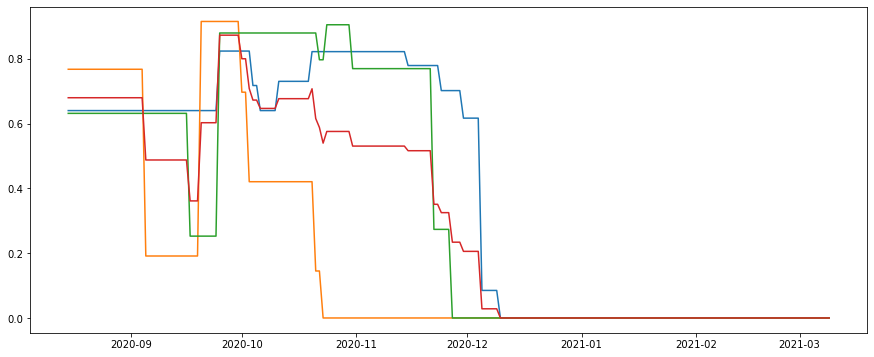

In [561]:
for H in [H_SVO, H_DME, H_VKO]:
    load = H.calc_load()
    plt.plot(list(load.keys()), list(load.values()))
    
plt.plot(list(load.keys()), np.mean([list(H.calc_load().values()) for H in [H_SVO, H_DME, H_VKO]], axis=0));

In [562]:
profit

159893000.0

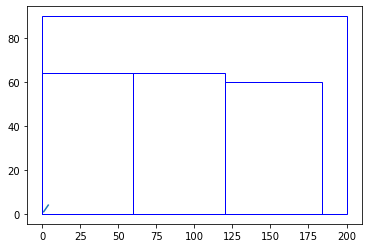

In [543]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

ax.plot([1,4],[1,4])

ax.add_patch(
     patches.Rectangle(
        (0, 0),
        200,
        90,
        edgecolor = 'blue',
        #facecolor = 'red',
        fill=False
     ) )

for rect in [H_SVO.clean_rect(rect) for rect in H_SVO.packers[datetime.date(2020, 9, 30)].rect_list()]:
    ax.add_patch(
         patches.Rectangle(
            (rect[0], rect[1]),
            rect[2],
            rect[3],
            edgecolor = 'blue',
            #facecolor = 'red',
            fill=False
         ) )

plt.show()

In [473]:
[H_SVO.clean_rect(rect) for rect in H_SVO.packers[datetime.date(2020, 10, 30)].rect_list()]

[[0, 0, 69, 73], [69, 0, 69, 73], [138, 0, 58, 55], [138, 55, 45, 34]]

In [406]:
H_SVO.rects

{datetime.date(2020, 5, 9): [[0, 0, 28, 31],
  [0, 31, 28, 31],
  [0, 62, 31, 28],
  [28, 0, 28, 31],
  [28, 31, 28, 31],
  [57, 0, 28, 31],
  [56, 62, 31, 28],
  [84, 31, 28, 31],
  [85, 0, 28, 31],
  [85, 31, 28, 31],
  [114, 0, 28, 31],
  [114, 31, 28, 31],
  [120, 62, 31, 28],
  [145, 62, 31, 28],
  [149, 59, 28, 31],
  [171, 56, 28, 31],
  [172, 56, 28, 31],
  [147, 60, 31, 28],
  [147, 58, 28, 31],
  [145, 58, 33, 29],
  [168, 58, 28, 31],
  [165, 58, 33, 29],
  [99, 58, 33, 29],
  [66, 58, 33, 29],
  [69, 58, 33, 29],
  [138, 55, 45, 34]],
 datetime.date(2020, 5, 10): [[0, 0, 28, 31],
  [0, 31, 28, 31],
  [0, 62, 31, 28],
  [28, 0, 28, 31],
  [28, 31, 28, 31],
  [57, 0, 28, 31],
  [56, 62, 31, 28],
  [84, 31, 28, 31],
  [85, 0, 28, 31],
  [85, 31, 28, 31],
  [114, 0, 28, 31],
  [114, 31, 28, 31],
  [120, 62, 31, 28],
  [145, 62, 31, 28],
  [149, 59, 28, 31],
  [171, 56, 28, 31],
  [172, 56, 28, 31],
  [147, 60, 31, 28],
  [147, 58, 28, 31],
  [145, 58, 33, 29],
  [168, 58, 28, 3

In [ ]:
#псевдокод

A_SVO, A_DME, A_VNO = class_init
target = 0

for order in order_list:

    plane = order.plane

    A_airs = best_air_list(plane)
    
    counts_sorted = list(range(order.count))[::-1]

    for order_count in counts_sorted:

        for A_air in A_airs:

            time_list = A_air.t_list()

            for t in time_list:

                    if A_air.is_available(t, order.delta, order_count, order.width, order.height):

                        A_air.update(t, order.delta, order_count, order.width, order.height)

                        target += order.sum * order.delta * order_count
                        
                        t_new = t + order.delta
                        
                        if t_new not in time_list:
                            A_air.add_t(t_new)

                        go_to_next_order
